# Decision Tree & Random Forest Implementation in python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import make_scorer

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18',
         'StandardHours'], axis="columns", inplace=True)

In [7]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [8]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

## 2. Data Visualisation

In [9]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288D337A760>,
      dtype=object)

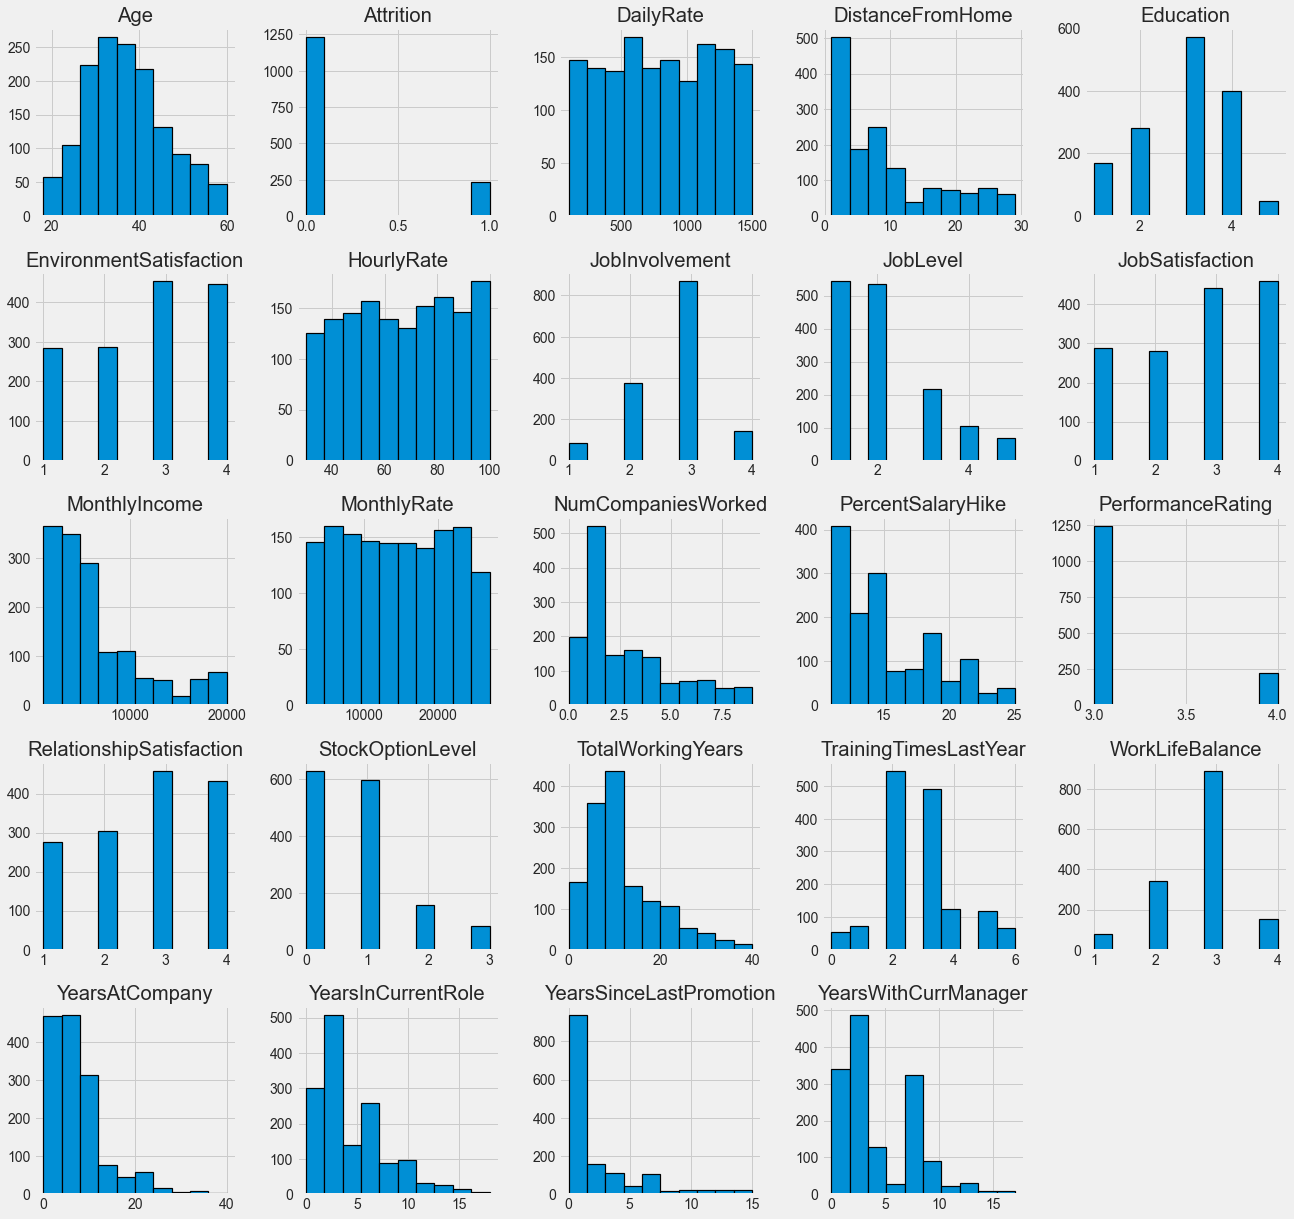

In [10]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [11]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]] /
                   (res[res.columns[0]] + res[res.columns[1]]))
    return res

In [12]:
corr_2_cols("Gender", "Attrition")

Attrition,0,1,perc
Gender,,,
Female,501,87,0.15
Male,732,150,0.17


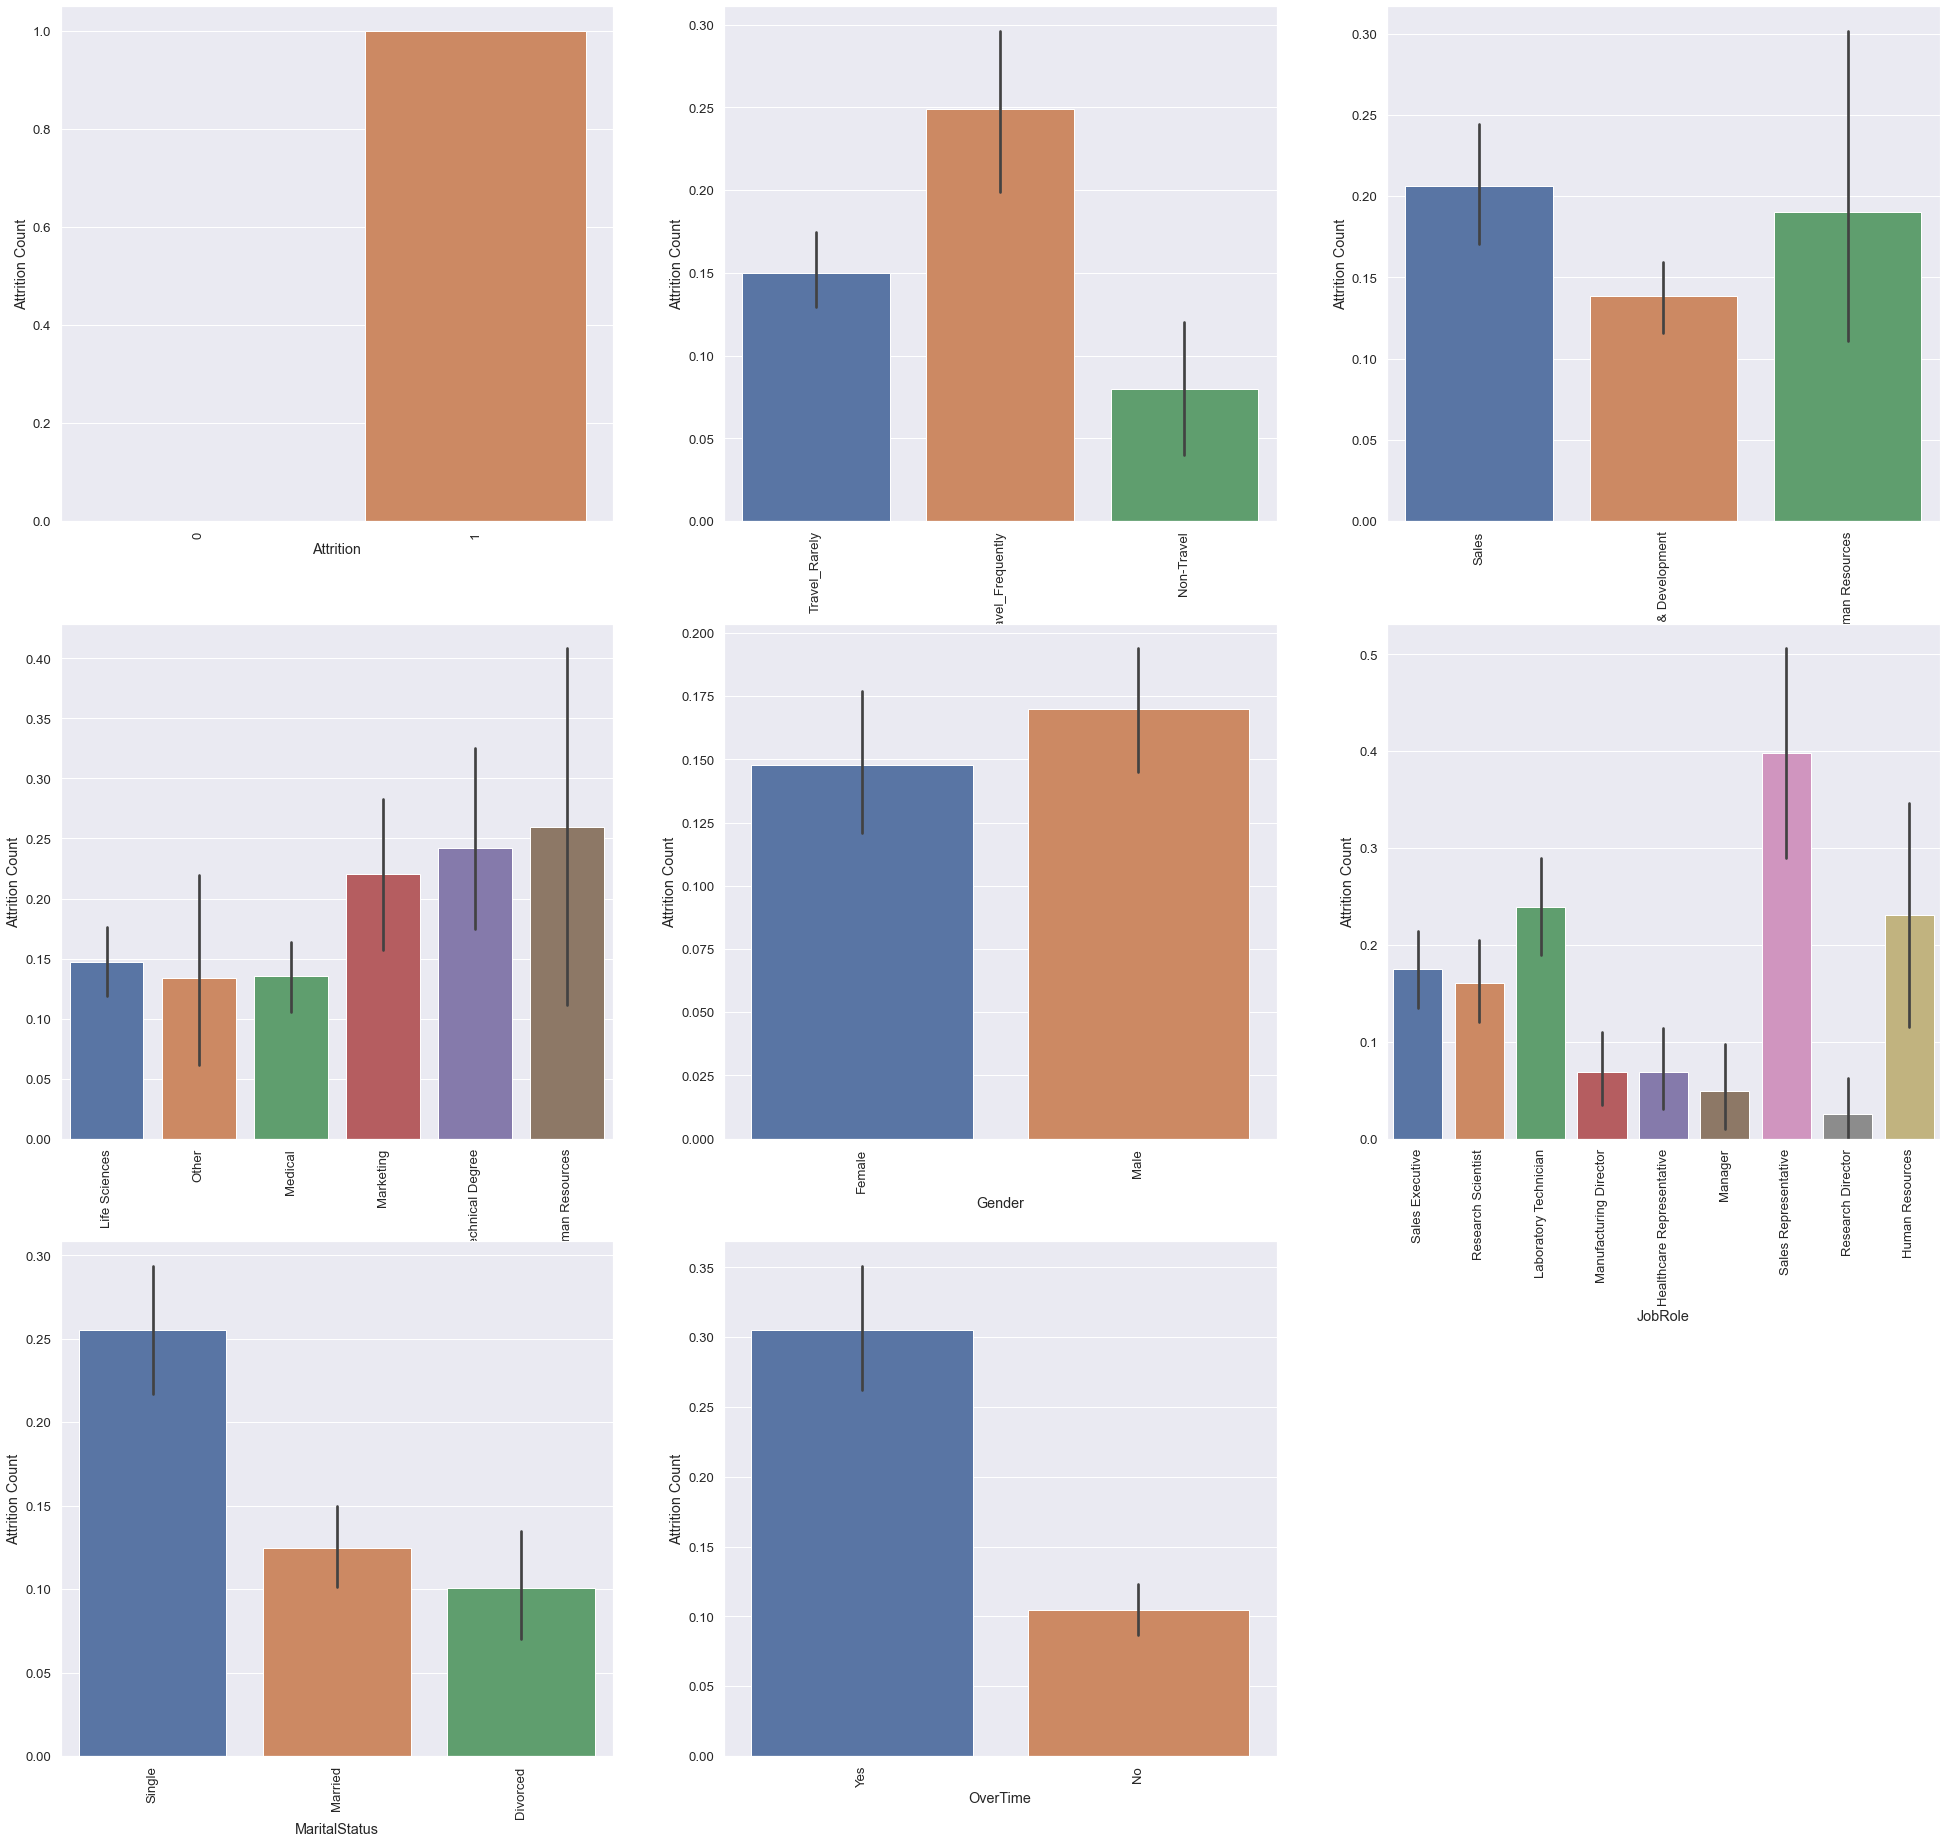

In [13]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

## 3. Correlation Matrix

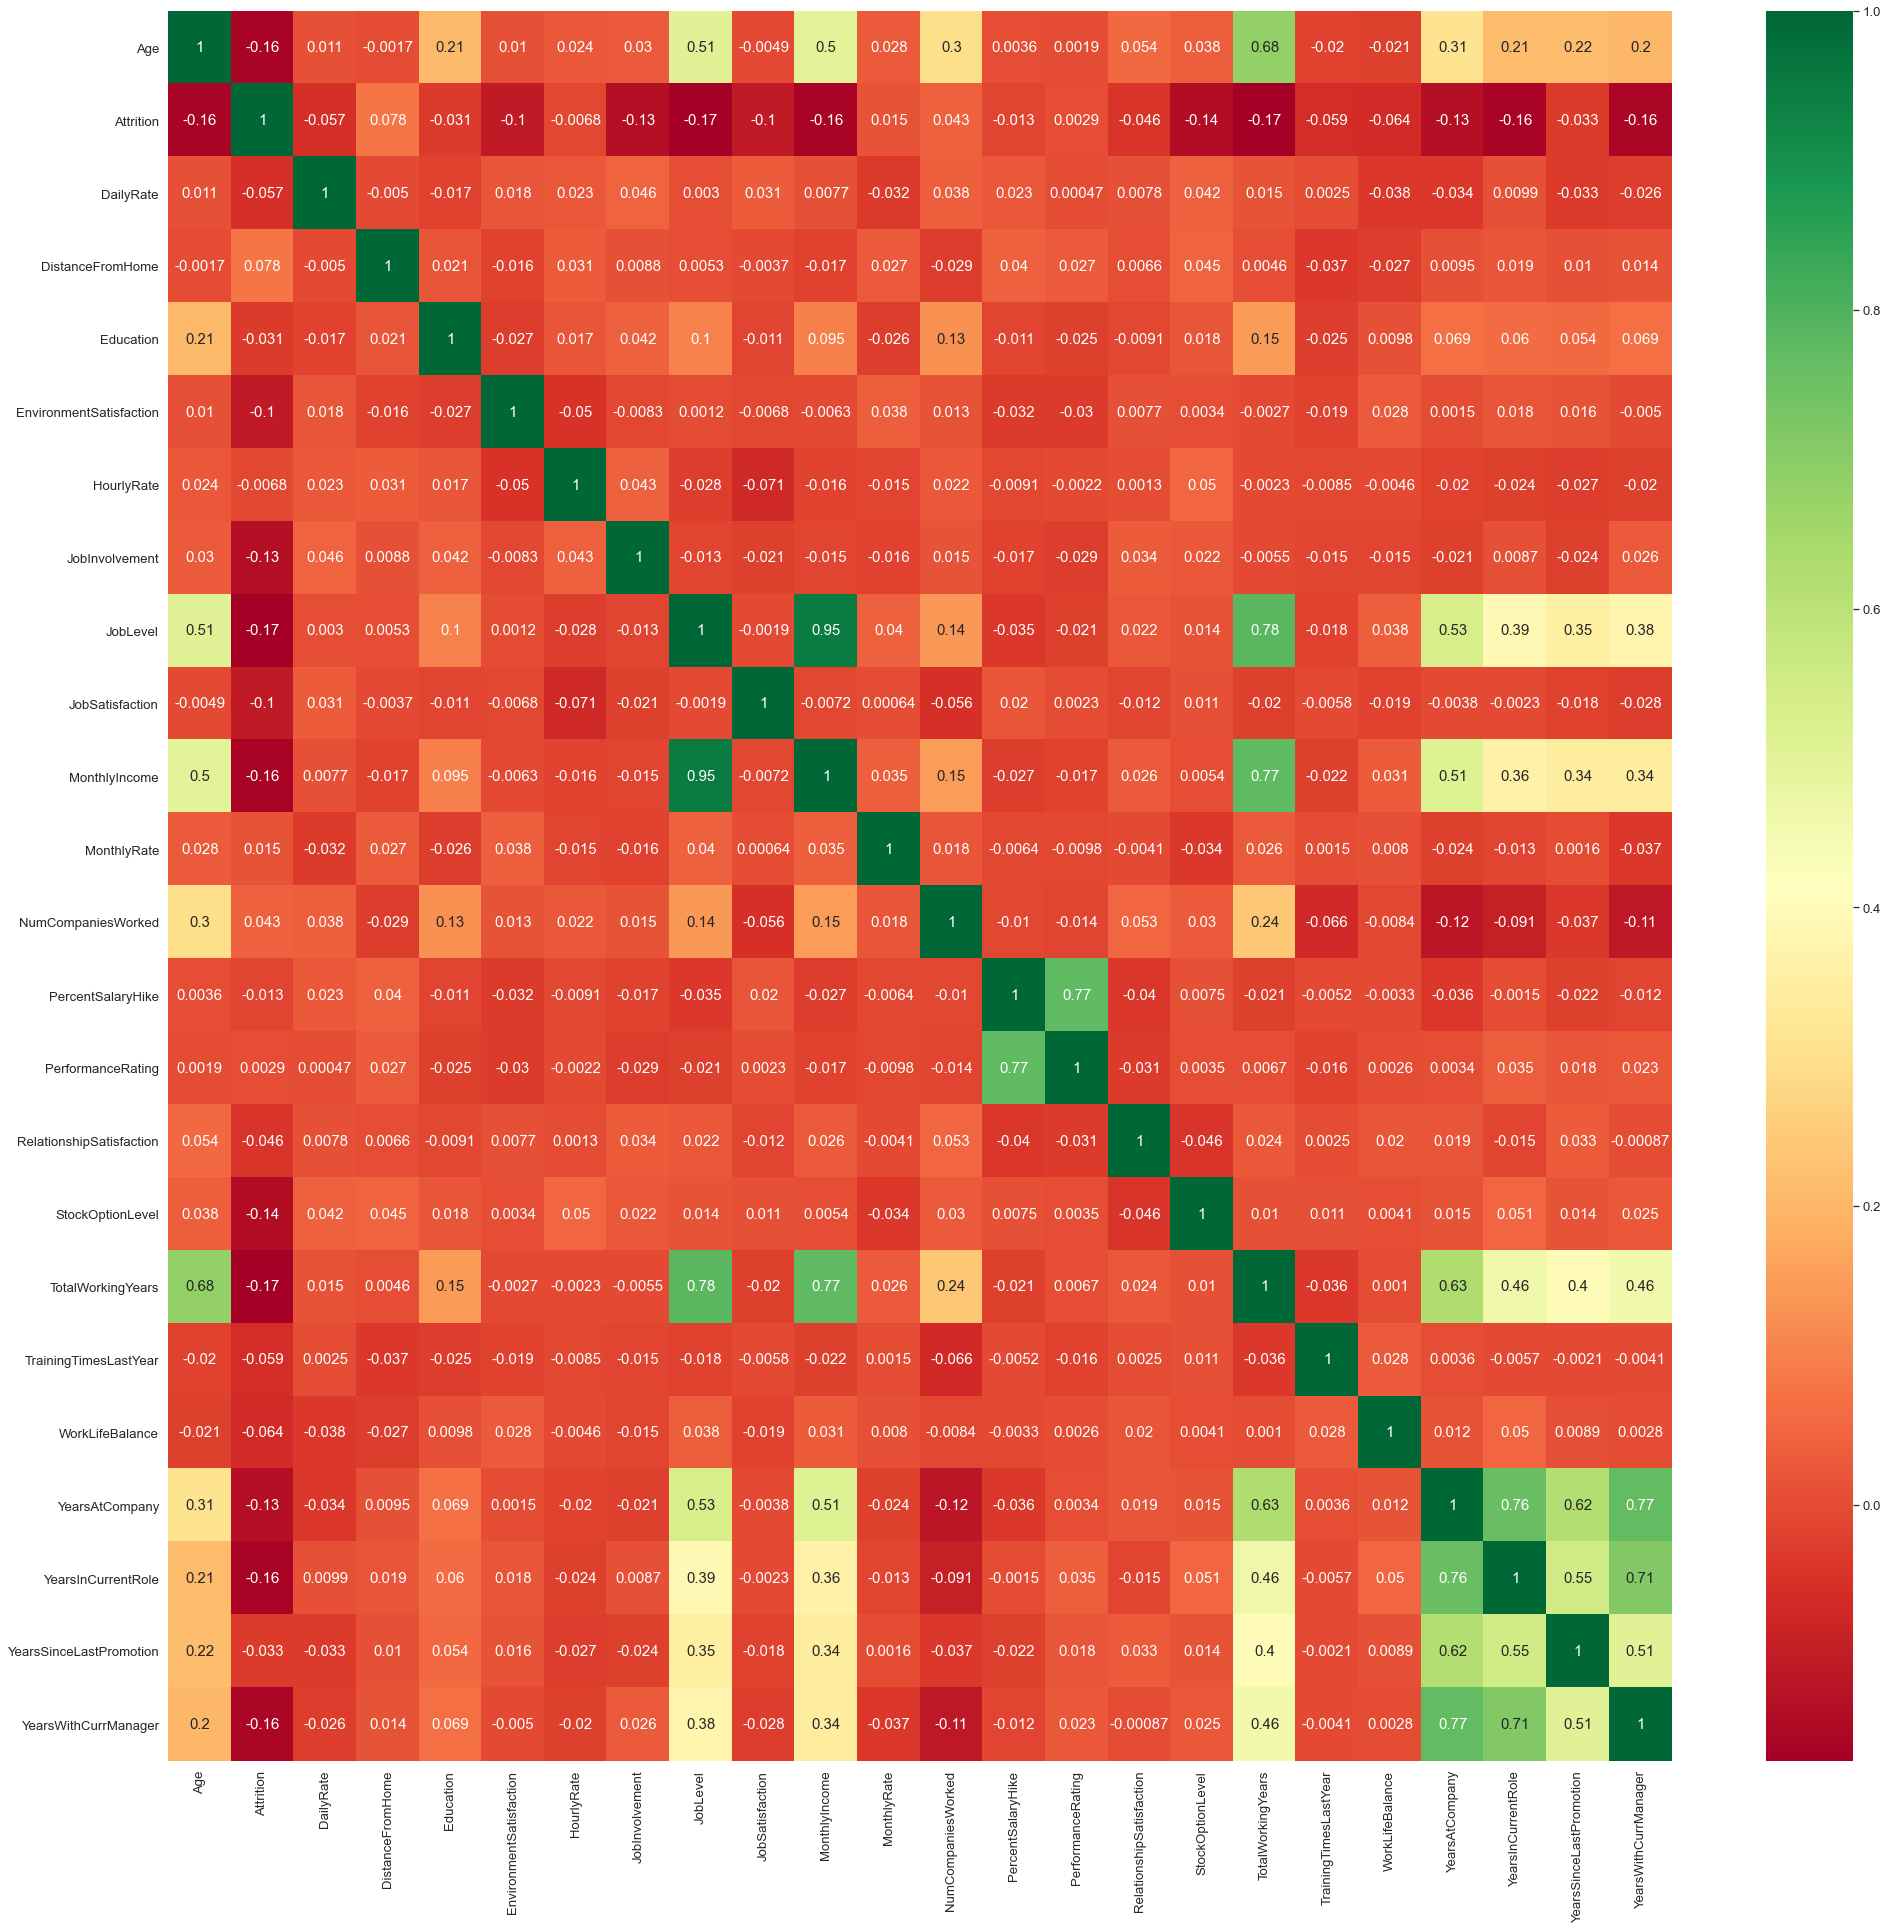

In [14]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})

## 4. Data Processing

In [15]:
categorical_col.remove('Attrition')

In [16]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

## 5. Applying machine learning algorithms

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(
            y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(
            classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 5. 1. Decision Tree Classifier

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.26      0.78       0.57          0.80
recall      0.85  0.33      0.78       0.59          0.78
f1-score    0.87  0.29      0.78       0.58          0.79
support   380.00 61.00      0.78     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[323  57]
 [ 41  20]]



### 5. 2. Decision Tree Classifier Hyperparameter tuning

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "max_depth": (list(range(1, 10))),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall",
                       n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 2052 candidates, totalling 6156 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 94.56%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   0.88      0.95       0.92          0.94
recall      0.98   0.78      0.95       0.88          0.95
f1-score    0.97   0.83      0.95       0.90          0.94
support   853.00 176.00      0.95    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[835  18]
 [ 38 138]]

Test Result:
Accuracy Score: 81.86%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.34      0.82       0.62          0.82
recall      0.89  0.34      0.82       0.62          0.82
f1-score    0.89  0.34      0.82

### 5. 3. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.18%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.96      0.97       0.97          0.97
recall      0.99   0.88      0.97       0.93          0.97
f1-score    0.98   0.91      0.97       0.95          0.97
support   853.00 176.00      0.97    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[846   7]
 [ 22 154]]

Test Result:
Accuracy Score: 82.54%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.25      0.83       0.56          0.78
recall      0.94  0.13      0.83       0.53          0.83
f1-score    0.90  0.17      0.83       0.54          0.80
support   380.00 61.00      0.83     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[356  24]
 [ 53   8]]



### 5. 4. Random Forest hyperparameter tuning

### Grid Search Cross Validation

In [22]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy",
                     cv=3, verbose=1, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.60      0.87       0.74          0.83
recall      0.99  0.10      0.87       0.54          0.87
f1-score    0.93  0.17      0.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# ADA boosting

In [24]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train, y_train)
print("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print("AdaBoost AUC = %2.2f" % ada_roc_auc)
#print(classification_report(y_test, ada.predict(X_test)))
#print(classification_report(y_train, ada.predict(X_train)))

print_score(ada, X_train, y_train, X_test, y_test, train=True)
print_score(ada, X_train, y_train, X_test, y_test, train=False)



 ---AdaBoost Model---
AdaBoost AUC = 0.61
Train Result:
Accuracy Score: 88.92%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.89      0.89       0.89          0.89
recall      0.99   0.40      0.89       0.70          0.89
f1-score    0.94   0.55      0.89       0.75          0.87
support   853.00 176.00      0.89    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[844   9]
 [105  71]]

Test Result:
Accuracy Score: 87.53%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.62      0.88       0.76          0.85
recall      0.98  0.25      0.88       0.61          0.88
f1-score    0.93  0.35      0.88       0.64          0.85
support   380.00 61.00      0.88     441.00        441.00
_______________________________________________
Confusion Matrix

In [25]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1464,26,2,1167,2,5,3,4,4,0,30,...,4,0,5,2,3,4,2,0,0,0
142,38,2,364,1,3,5,5,4,0,32,...,2,0,19,2,3,3,2,2,2,0
1201,23,2,1320,1,8,1,3,4,1,93,...,1,0,5,2,3,5,4,1,2,1
536,60,2,1179,2,16,4,2,1,1,84,...,4,0,10,1,3,2,2,2,2,0
386,37,2,1107,1,14,3,1,4,0,95,...,3,1,18,2,2,18,7,12,17,0
397,25,2,891,2,4,2,1,2,0,99,...,2,0,5,3,3,5,4,1,3,0
519,29,1,806,1,1,4,1,2,1,76,...,4,1,10,5,3,10,7,2,8,0
842,28,2,1485,1,12,1,1,3,0,79,...,4,0,1,4,2,1,1,0,0,1
7,30,2,1358,1,24,1,1,4,1,67,...,2,1,1,2,3,1,0,0,0,0
998,26,2,683,1,2,1,3,1,1,36,...,4,0,5,2,3,4,3,1,1,0


In [26]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.Attrition == 0]
df_minority = df_train[df_train.Attrition == 1]

print(df_majority.Attrition.count())
print("-----------")
print(df_minority.Attrition.count())
print("-----------")
print(df_train.Attrition.value_counts())

853
-----------
176
-----------
0    853
1    176
Name: Attrition, dtype: int64


In [27]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=853,    # to match majority class
                                 random_state=587)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Attrition.value_counts()

1    853
0    853
Name: Attrition, dtype: int64

In [28]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=176,     # to match minority class
                                   random_state=24)  # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Attrition.value_counts()

1    176
0    176
Name: Attrition, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

1706
853
1    853
0    853
Name: Attrition, dtype: int64


In [30]:
y_upsampled = df_upsampled.Attrition
X_upsampled = df_upsampled.drop(['Attrition'], axis=1)

In [31]:
y_downsampled = df_downsampled.Attrition
X_downsampled = df_downsampled.drop(['Attrition'], axis=1)

# Gradient Boosting

In [32]:
# Gradient Boosting on upsampled training set

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
param_grid = {'n_estimators': [100, 200, 300, 400],
              'learning_rate': [0.05, 0.1, 0.3, 0.5, 0.75, 1.0]
              }
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 26.1 s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=400)
0.9574714095623289


In [33]:
print_score(gbc_upsampled, X_SMOTE, y_SMOTE, X_test, y_test, train=True)
print_score(gbc_upsampled, X_SMOTE, y_SMOTE, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.81%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.78   1.00      0.86       0.89          0.89
recall      1.00   0.72      0.86       0.86          0.86
f1-score    0.88   0.83      0.86       0.86          0.86
support   853.00 853.00      0.86    1706.00       1706.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [242 611]]

Test Result:
Accuracy Score: 84.35%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.41      0.84       0.65          0.82
recall      0.93  0.30      0.84       0.61          0.84
f1-score    0.91  0.34      0.84       0.63          0.83
support   380.00 61.00      0.84     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[354  26]
 [ 43  18]]



In [34]:
# Adaboost on upsampled training set
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.1, 0.5, 0.75, 1.0]}
acc_scorer = make_scorer(recall_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid,
                        scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 8.97 s
AdaBoostClassifier(learning_rate=0.5, n_estimators=300)
0.832610939112487


In [35]:
print_score(ada_upsampled, X_SMOTE, y_SMOTE, X_test, y_test, train=True)
print_score(ada_upsampled, X_SMOTE, y_SMOTE, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.67%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.92      0.93       0.93          0.93
recall      0.92   0.94      0.93       0.93          0.93
f1-score    0.93   0.93      0.93       0.93          0.93
support   853.00 853.00      0.93    1706.00       1706.00
_______________________________________________
Confusion Matrix: 
 [[783  70]
 [ 55 798]]

Test Result:
Accuracy Score: 81.63%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.91  0.38      0.82       0.64          0.84
recall      0.87  0.49      0.82       0.68          0.82
f1-score    0.89  0.43      0.82       0.66          0.83
support   380.00 61.00      0.82     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[330  50]
 [ 31  30]]

